# Statistical Inference and Confidence Intervals
* Notebook completed by Adam Lang
* Date: 4/10/2024
* This notebook will go over statistical inference and confidence interval principles and python implementation. This was completed as part of the Springboard Data Science fellowship and LinkedIn Learning course "Python Statistics Essential Training."

In [2]:
# import libraries
import math
import io

#numpy and pandas
import numpy as np
import pandas as pd

# import viz libraries
import matplotlib.pyplot as plt
%matplotlib inline

# scipy libraries
import scipy.stats
import scipy.optimize
import scipy.spatial

# Case Study Scenario:
* A very important election is taking place in the city you live in, you work for the local newspaper and you are asked to poll the local population with a sample size of 1000 people and ask who they will vote for.
* The candidates for the election are:
1. "Brown" - incumbent mayor
2. "Green" - a local chef running against him.

In [3]:
# import poll csv file
poll = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/poll.csv')

In [4]:
# head of data
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [5]:
# data info
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


#### Statistical Exploration

In [6]:
poll.vote.value_counts(normalize=True)

vote
Brown    0.511
Green    0.489
Name: proportion, dtype: float64

Summary: The data right now tells us that the candidate "Brown" who is the incumbent will remain Mayor based on our sample poll.

# Simulations
* Right now the results are weighted based on the sample of the population.
    * This is known as `Sampling Variability`
* To test this we want to study the `Sampling Distribution` of the proportion.
    * This will give us the range of samples we will get for the sampling distribution of the proportion.
    * Simulation using numpy is a good way to do this.

In [7]:
# define a function
def sample(brown,n=1000):
  return pd.DataFrame({'vote': np.where(np.random.rand(n) < brown, 'Brown','Green')})

In [8]:
## lets look at 1 sample
s = sample(0.51,n=1000)

In [9]:
# counts for 2 candidates
s.vote.value_counts(normalize=True)

vote
Brown    0.538
Green    0.462
Name: proportion, dtype: float64

Note: keep in mind this Sampling Distribution above is based on a random sample using the np.random.rand

Therefore we want to repeat this many times over and over again.

In [12]:
# repeat and add to datarame
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)]) # 1000 simulations

In [13]:
# print out head of 1000 simulations
dist.head()

vote,Brown,Green
proportion,0.506,0.494
proportion,0.519,0.481
proportion,0.496,0.504
proportion,0.501,0.499
proportion,0.504,0.496


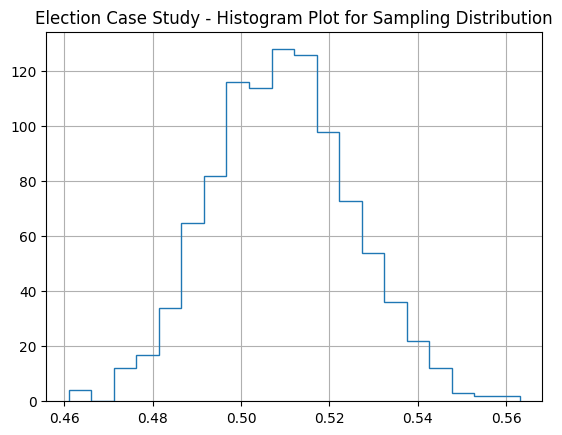

In [23]:
# matplotlib histogram
dist.Brown.hist(histtype='step', bins=20);
plt.title('Election Case Study - Histogram Plot for Sampling Distribution')
plt.show();

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 12.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 40.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


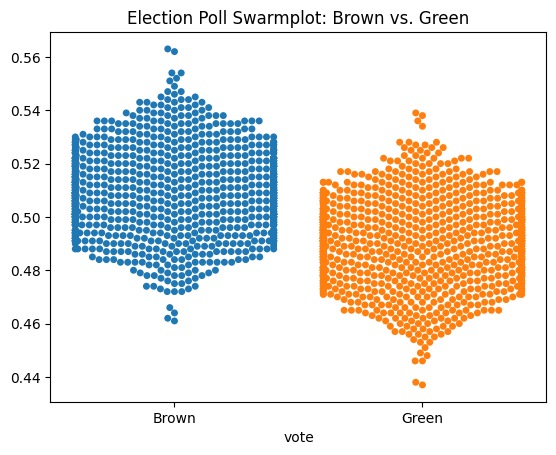

In [21]:
# lets try this in seaborn
import seaborn as sns
sns.swarmplot(dist)
plt.title('Election Poll Swarmplot: Brown vs. Green')
plt.show()

# Introducing **Confidence Intervals**
* Built from the dataset.
* Contains the true value of a population parameter XX% of the time (95% of the time).
* Over many similar experiments.
* We can simulate this in python.

In [24]:
# define a function for confident interval sampling
def samplingdist(brown,n=1000):
  return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [25]:
# construct function to extract quantiles
def quantiles(brown,n=1000):
  dist = samplingdist(brown,n)
  return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [26]:
# test quantile function
quantiles(0.50)

(0.47, 0.531025)

In [29]:
#quantiles again
quantiles(0.48)

(0.450975, 0.51)

In [28]:
# again
quantiles(0.54)

(0.511, 0.571)

# Conclusions
* 95% confidence interval: [0.45, 0.54]
* Estimate = 0.51 +/- 0.03 (at 95% confidence)
    * point estimate is 0.51 - margin of error is 0.03
* Conclusion: Estimate lies within the 95% confidence interval.

# Additional Simulations
* sample at 50% with 10,000 samples
* plot another histogram

In [30]:
dist = samplingdist(0.50,10000)

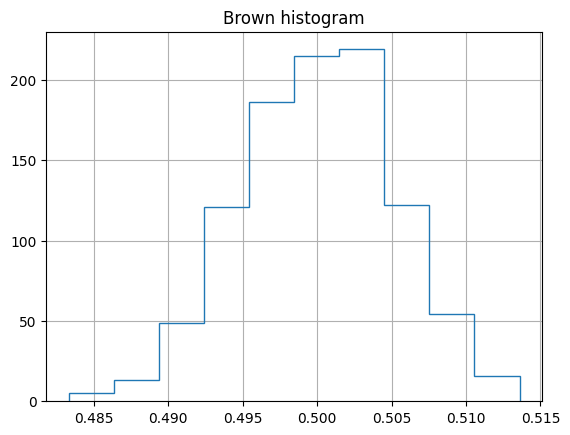

In [32]:
# matplotlib hist
dist.Brown.hist(histtype='step')
plt.title('Brown histogram')
plt.show();

Margin of error is around 1%

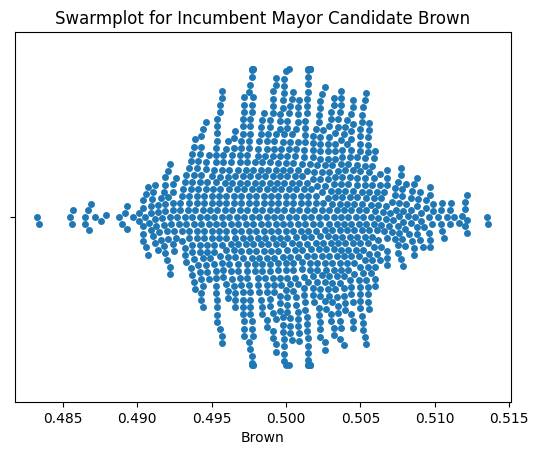

In [33]:
# swarmplot
sns.swarmplot(x='Brown',data=dist)
plt.title('Swarmplot for Incumbent Mayor Candidate Brown')
plt.show();

# Let's look at the poll data itself

In [34]:
largepoll = pd.read_csv('/content/drive/MyDrive/Springboard_Data_Science/Statistics_Chapter/poll-larger.csv')

In [35]:
# true value_counts()
largepoll.vote.value_counts(normalize=True)

vote
Green    0.5181
Brown    0.4819
Name: proportion, dtype: float64

We can see the likely winner is actualy Mrs. Green and not Mr. Brown.